### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [35]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [36]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [37]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [38]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Your question 1 goes here.**

In [39]:
file_names = list.files(pattern = ".csv")
file_names
 
# Read data (this will take a second)
df_list = lapply(file_names,
                 function(x) read.csv(x, stringsAsFactors = FALSE))

# Assign names to data frames in the list
names(df_list) = file_names
                 
# Extract column names from the first data frame
names(df_list[[1]])
                 

# Bind data frames by rows
library(dplyr)   # for data manipulation
df = bind_rows(df_list)

# Glimpse at df
glimpse(df)               
                 

[1] "chicago.csv"       "new_york_city.csv" "washington.csv"

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

Observations: 152,451
Variables: 9
$ X             <int> 1423854, 955915, 9031, 304487, 45207, 1473887, 961916, …
$ Start.Time    <chr> "2017-06-23 15:09:32", "2017-05-25 18:19:03", "2017-01-…
$ End.Time      <chr> "2017-06-23 15:14:53", "2017-05-25 18:45:53", "2017-01-…
$ Trip.Duration <dbl> 321, 1610, 416, 350, 534, 586, 281, 723, 689, 493, 301,…
$ Start.Station <chr> "Wood St & Hubbard St", "Theater on the Lake", "May St …
$ End.Station   <chr> "Damen Ave & Chicago Ave", "Sheffield Ave & Waveland Av…
$ User.Type     <chr> "Subscriber", "Subscriber", "Subscriber", "Subscriber",…
$ Gender        <chr> "Male", "Female", "Male", "Male", "Male", "Male", "Fema…
$ Birth.Year    <dbl> 1992, 1992, 1981, 1986, 1975, 1990, 1983, NA, 1984, 197…


In [40]:
# Format data structure
library(stringr) 
library(ggplot2)
library(lubridate)

glimpse(df)
#Most common month

head(df)
df<-as.data.frame(df)
df_month<- format(as.POSIXct(df$Start.Time, "%Y-%m-%d %H:%M:%S", tz = ""), format = "%m")
table(df_month)



Observations: 152,451
Variables: 9
$ X             <int> 1423854, 955915, 9031, 304487, 45207, 1473887, 961916, …
$ Start.Time    <chr> "2017-06-23 15:09:32", "2017-05-25 18:19:03", "2017-01-…
$ End.Time      <chr> "2017-06-23 15:14:53", "2017-05-25 18:45:53", "2017-01-…
$ Trip.Duration <dbl> 321, 1610, 416, 350, 534, 586, 281, 723, 689, 493, 301,…
$ Start.Station <chr> "Wood St & Hubbard St", "Theater on the Lake", "May St …
$ End.Station   <chr> "Damen Ave & Chicago Ave", "Sheffield Ave & Waveland Av…
$ User.Type     <chr> "Subscriber", "Subscriber", "Subscriber", "Subscriber",…
$ Gender        <chr> "Male", "Female", "Male", "Male", "Male", "Male", "Fema…
$ Birth.Year    <dbl> 1992, 1992, 1981, 1986, 1975, 1990, 1983, NA, 1984, 197…


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


df_month
   01    02    03    04    05    06 
15341 18857 19235 30709 31157 37151 

ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): argument "x" is missing, with no default


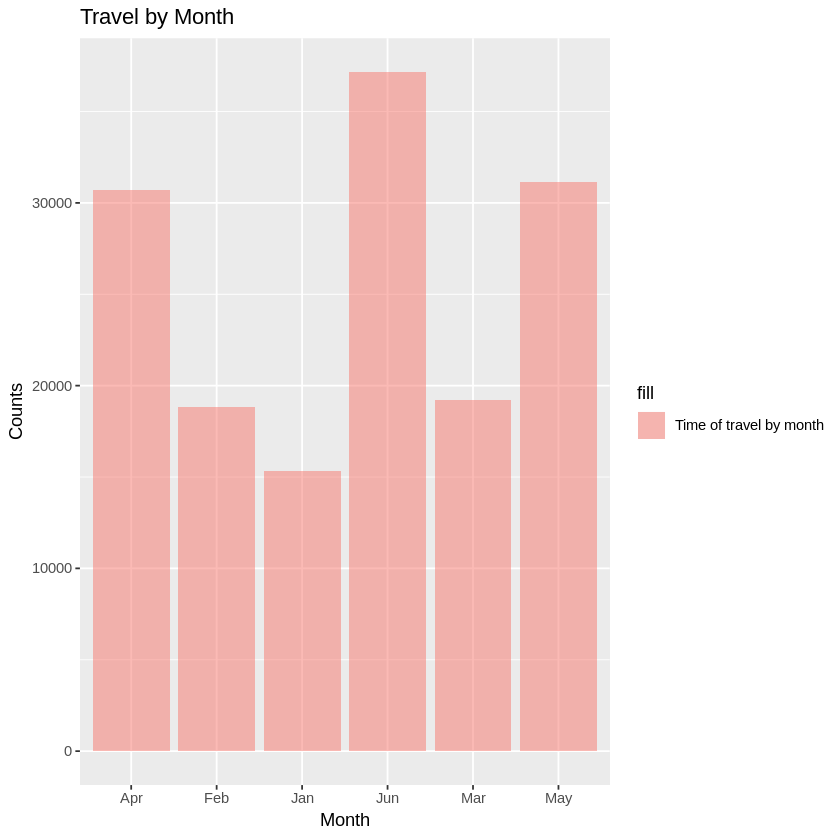

In [32]:
##Times of travel most common month
month <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun")
Counts <- c( 15341 ,18857, 19235 ,30709 ,31157 ,37151  )
dt<-data.frame(Month<-month, Counts =Counts)
ggplot(dt ,aes( Month,Counts )) + 
  geom_bar(stat="identity",aes(fill = "Time of travel by month"), data =dt , alpha = 0.5 ) + ggtitle("Travel by Month")
+text(label = , pos = 3, cex = 0.8, col = "red")  
## In terms of popular times of travel, June is the most common month. 

In [41]:
df_weekday<- format(as.POSIXct(df$Start.Time, "%Y-%m-%d %H:%M:%S", tz = ""))
df_weekday<-as.POSIXlt(df_weekday)$wday
table(df_weekday)


df_weekday
    0     1     2     3     4     5     6 
19274 20593 22478 25080 23187 22379 19459 

ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): argument "x" is missing, with no default


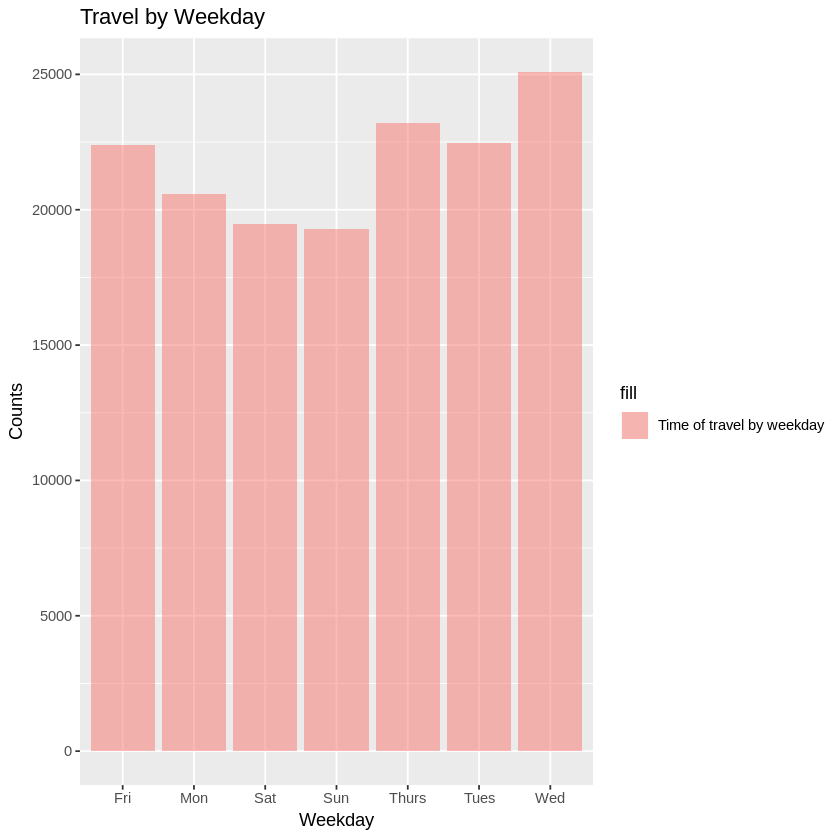

In [42]:
##Times of travel most common day of week
Weekday <- c("Sun", "Mon", "Tues", "Wed", "Thurs", "Fri","Sat")
Counts <- c( 19274, 20593, 22478 ,25080, 23187 ,22379, 19459  )
dt<-data.frame(Weekday<-Weekday, Counts =Counts)
ggplot(dt ,aes( Weekday,Counts )) + 
  geom_bar(stat="identity",aes(fill = "Time of travel by weekday"), data =dt , alpha = 0.5 ) + ggtitle("Travel by Weekday")
+text(label = , pos = 3, cex = 0.8, col = "red")  
## In terms of popular day of week fro travel , Wedneday is the most common day of week.

In [47]:
df<-as.data.frame(df)
df_hour <- format(as.POSIXct(df$Start.Time, "%Y-%m-%d %H:%M:%S", tz = ""))
df_hour<-strftime(df_hour, format="%H")
table(df_hour)


df_hour
   00    01    02    03    04    05    06    07    08    09    10    11    12 
  718  3757  3591  3731  4642  7120  8449 11562 14835  9863  7579  8167  8917 
   13    14    15    16    17    18    19    20    21    22    23 
 5490  5397  6091  7444 10500  8988  5801  3886  2738  1965  1219 

df_hour
   00    01    02    03    04    05    06    07    08    09    10    11    12 
  718  3757  3591  3731  4642  7120  8449 11562 14835  9863  7579  8167  8917 
   13    14    15    16    17    18    19    20    21    22    23 
 5490  5397  6091  7444 10500  8988  5801  3886  2738  1965  1219 

ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): argument "x" is missing, with no default


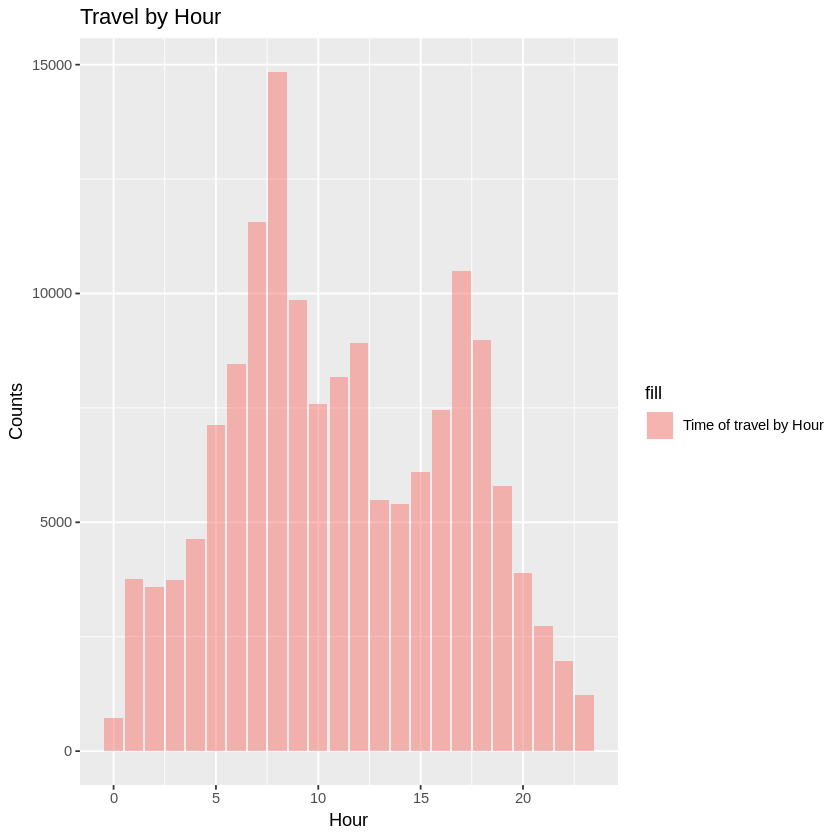

In [55]:
##Times of travel most common hour of day
Hour <- seq(0,23, by = 1) 
Counts <- c(718 ,3757 , 3591,  3731  ,4642 , 7120,  8449 ,11562, 14835 , 9863 , 7579 , 8167 , 8917 , 5490  ,5397 , 6091  ,7444, 10500 , 8988 , 5801 , 3886,  2738  ,1965 , 1219 )
dt<-data.frame(Hour<-Hour, Counts =Counts)
ggplot(dt ,aes( Hour,Counts )) + 
  geom_bar(stat="identity",aes(fill = "Time of travel by Hour"), data =dt , alpha = 0.5 ) + ggtitle("Travel by Hour")
+text(label =Counts , pos = 3, cex = 0.8, col = "red")  
## In terms of popular day of day for travel , 8am is the most common hour of day.

**Summary of your question 1 results goes here.**

### Question 2

**Your question 2 goes here.**

In [76]:
# The most commmon Start station
rank_Start.Station <- arrange(df, desc(Start.Station)) %>%
          mutate(rank = 1:nrow(df))
head(rank_Start.Station,1)
# The most commmon Start station is Yuma St & Tenley Circle NW   

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,commontrip,rank
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Yuma St & Tenley Circle NW Connecticut Ave & Yuma St NW,1


In [77]:
# The most commmon End station
rank_End.Station <- arrange(df, desc(End.Station)) %>%
          mutate(rank = 1:nrow(df))
head(rank_End.Station,1)
# The most commmon End station is Yuma St & Tenley Circle NW 

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,commontrip,rank
1031737,2017-05-02 07:46:28,2017-05-02 07:55:32,544.052,Connecticut & Nebraska Ave NW,Yuma St & Tenley Circle NW,Subscriber,NA,NA,Connecticut & Nebraska Ave NW Yuma St & Tenley Circle NW,1


In [65]:
#The most common trip from start to end 
df$commontrip <- paste(df$Start.Station,df$End.Station)
rank_commontrip <- arrange(df, desc(commontrip)) %>%
          mutate(rank = 1:nrow(df))
head(rank_commontrip,1)
#Yuma St & Tenley Circle NW Wisconsin Ave & O St NW	1 is the most common tirp 

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,commontrip,rank
1253736,2017-05-23 03:15:47,2017-05-23 03:41:45,1557.887,Yuma St & Tenley Circle NW,Wisconsin Ave & O St NW,Subscriber,NA,NA,Yuma St & Tenley Circle NW Wisconsin Ave & O St NW,1


**Summary of your question 2 results goes here.**

### Question 3

**Your question 3 goes here.**

In [113]:
#Total travel time for users in different cities 
sum_df<-df %>%  na.omit()%>% mutate(total_traveltime = sum(Trip.Duration))
head(sum_df,1)
#Total travel time for users in different cities is 44125905 hours

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,commontrip,total_traveltime
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Wood St & Hubbard St Damen Ave & Chicago Ave,44125905


In [117]:
#Average travel time for users in different cities 
mean_df<-df %>%  na.omit()%>% mutate(mean_traveltime = mean(Trip.Duration))
head(mean_df,1)

#Average travel time for users in different cities is 781.889 hours

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,commontrip,mean_traveltime
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Wood St & Hubbard St Damen Ave & Chicago Ave,781.889


In [95]:
# User info 
# Count of each user type 
df%>% group_by(User.Type)%>% count


User.Type,n
,121
Customer,30754
Subscriber,121576


**Summary of your question 3 results goes here.**

In [96]:
#Counts of each gender 
df %>% group_by(Gender)%>% count


Gender,n
,7158
Female,13882
Male,42360
NA,89051


In [108]:
#Counts of most common year of birth 
summary(df$Birth.Year)
#The earliest year of birth is 1885, the most recent year of brith is 2002, most common year of birth is 1981 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1970    1981    1979    1988    2002   96016 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [17]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')